## FIND BEST MODEL FOR SENTIMENT ANALYSIS 

- By Alif Dio A.



### 1. Import Library dan Persiapan Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset yang digunakan adalah **"Indonesian Twitter Sentiment Analysis Dataset-PPKM"**, atau lebih rinci nya yaitu **"INA_TweetsPPKM_Labeled_Pure.csv"**. Dataset ini diambil dari Kaggle dengan ukuran **5.25 MB** dan memiliki dimensi data sebanyak **23.644 baris** dan **4 kolom**.

Link dataset: [Indonesian Twitter Sentiment Analysis Dataset-PPKM](https://www.kaggle.com/datasets/anggapurnama/twitter-dataset-ppkm)


In [2]:
# Load Dataset
df = pd.read_csv("D:\MyCoding\Python\Task_TMS\INA_TweetsPPKM_Labeled_Pure.csv", sep="\t")

# Menampilkan Dataframe
df

,Date,User,Tweet,sentiment
0,2022-03-31 14:32:04+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
1,2022-03-31 09:26:00+00:00,inewsdotid,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,1
2,2022-03-31 05:02:34+00:00,vdvc_talk,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...",1
3,2022-03-30 14:23:10+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
4,2022-03-30 11:28:57+00:00,tvOneNews,Kementerian Agama menerbitkan Surat Edaran Nom...,1
...,...,...,...,...
23639,2020-06-26 18:34:56+00:00,bananabluff,noelle loses a bet to akarsha and it somehow e...,1
23640,2020-06-19 15:14:07+00:00,Auqroix,they call her... weekeeshee...\n#butterflysoup...,1
23641,2020-06-18 23:45:26+00:00,Auqroix,"put out what you wanna see more of, amirite ga...",1
23642,2020-06-15 23:17:22+00:00,Auqroix,"i don't need anybody, i'm fine here on my own\...",1


In [3]:
# Menampilkan beberapa baris pertama
df.head()

,Date,User,Tweet,sentiment
0,2022-03-31 14:32:04+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
1,2022-03-31 09:26:00+00:00,inewsdotid,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,1
2,2022-03-31 05:02:34+00:00,vdvc_talk,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...",1
3,2022-03-30 14:23:10+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
4,2022-03-30 11:28:57+00:00,tvOneNews,Kementerian Agama menerbitkan Surat Edaran Nom...,1


In [4]:
# Menampilkan beberapa baris akhir
df.tail()

,Date,User,Tweet,sentiment
23639,2020-06-26 18:34:56+00:00,bananabluff,noelle loses a bet to akarsha and it somehow e...,1
23640,2020-06-19 15:14:07+00:00,Auqroix,they call her... weekeeshee...\n#butterflysoup...,1
23641,2020-06-18 23:45:26+00:00,Auqroix,"put out what you wanna see more of, amirite ga...",1
23642,2020-06-15 23:17:22+00:00,Auqroix,"i don't need anybody, i'm fine here on my own\...",1
23643,2020-05-06 04:34:13+00:00,nindiiayudya,"Selamat Siang sahabat online, nih aku sedikit ...",0


In [5]:
# Cek apakah ada nilai null di setiap kolom
print(df.isnull().sum())

Date         0
User         0
Tweet        0
sentiment    0
dtype: int64


In [6]:
# Melihat Informasi Dasar Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23644 entries, 0 to 23643
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23644 non-null  object
 1   User       23644 non-null  object
 2   Tweet      23644 non-null  object
 3   sentiment  23644 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 739.0+ KB


In [7]:
# Melihat distribusi atribut sentiment
df['sentiment'].value_counts()

sentiment
1    17706
2     3980
0     1958
Name: count, dtype: int64

### 2. Preprocessing Data

membersihkan teks dari URL dan karakter yang tidak relevan, serta mengubah teks menjadi huruf kecil untuk memudahkan analisis.

In [8]:
import re
from nltk.corpus import stopwords

In [9]:
def clean_text(text):
    # Hapus URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Menghapus URL
    
    # Hapus karakter selain huruf, spasi, dan karakter yang perlu dipertahankan (# dan @)
    text = re.sub(r'[^a-zA-Z\s#@]', '', text)  # Menghapus angka dan tanda baca selain # dan @
    
    # Ubah ke lowercase
    text = text.lower()
    
    return text

In [10]:
# Terapkan fungsi pembersihan ke kolom 'Tweet'
df['clean_text'] = df['Tweet'].apply(clean_text)

# Tampilkan contoh teks yang sudah dibersihkan
print(df[['Tweet', 'clean_text']].head())

                                               Tweet  \
0  Ketahui informasi pembagian #PPKM di wilayah J...   
1  Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...   
2  Juru bicara Satgas Covid-19, Wiku Adisasmito m...   
3  Ketahui informasi pembagian #PPKM di wilayah J...   
4  Kementerian Agama menerbitkan Surat Edaran Nom...   

                                          clean_text  
0  ketahui informasi pembagian #ppkm di wilayah j...  
1  tempat ibadah di wilayah ppkm level  boleh ber...  
2  juru bicara satgas covid wiku adisasmito menje...  
3  ketahui informasi pembagian #ppkm di wilayah j...  
4  kementerian agama menerbitkan surat edaran nom...  


### 3. Eksplorasi Data

melakukan eksplorasi data dengan visualisasi distribusi label sentimen dan membuat wordcloud dari teks yang telah dibersihkan

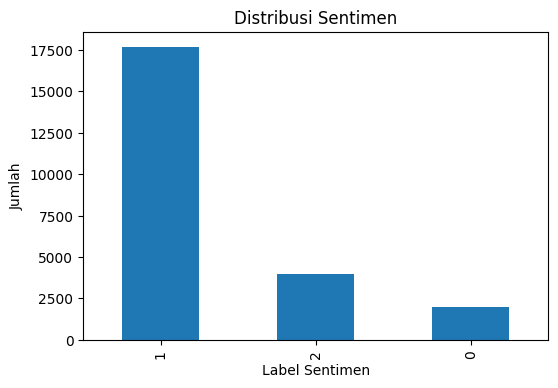

In [11]:
# Visualisasi distribusi label sentimen
plt.figure(figsize=(6, 4))
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Distribusi Sentimen')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [12]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [13]:
# Import Wordcloud
from wordcloud import WordCloud


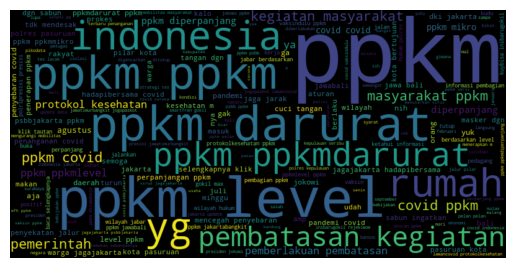

In [14]:
# Membuat Wordcloud untuk kata-kata yang sering muncul
stop_words = set(stopwords.words('indonesian'))

# Gabungkan semua teks dalam kolom 'clean_text' menjadi satu string panjang
text = ' '.join(df['clean_text'])

# Buat wordcloud
wordcloud = WordCloud(width=800, height=400, stopwords=stop_words).generate(text)

# Tampilkan wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### 4. Split Data

Dataset dibagi menjadi dua bagian: data latih dan data uji, dengan proporsi 70% untuk latih dan 30% untuk uji.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Membagi data menjadi fitur (X) dan target (y)
X = df['clean_text']
y = df['sentiment']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menampilkan ukuran dataset latih dan uji
print(f'Ukuran data latih: {X_train.shape}, Ukuran data uji: {X_test.shape}')


Ukuran data latih: (16550,), Ukuran data uji: (7094,)


### 5. Vectorization (TF-IDF)

mengubah teks menjadi representasi numerik menggunakan metode TF-IDF (Term Frequency-Inverse Document Frequency) dengan maksimal 5000 fitur.

In [17]:
# Mengimport TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
# Menggunakan TF-IDF untuk vektorisasi teks
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Menampilkan contoh fitur setelah vektorisasi
print(X_train_tfidf.shape)


(16550, 5000)


### 6. Pengembangan Model

Dalam analisis sentimen ini, digunakan tiga metode utama: **Logistic Regression**, **Random Forest**, dan **Support Vector Machine (SVM)**. Alasan pemilihan masing-masing model adalah sebagai berikut:  

**1. Logistic Regression**  
Logistic Regression dipilih karena model ini:  
- Sederhana dan mudah diinterpretasikan.  
- Sering digunakan sebagai baseline model.  
- Memberikan hasil yang cukup baik untuk tugas klasifikasi.  

**2. Random Forest**  
Random Forest dipilih karena:  
- Mampu menangani data dengan banyak fitur tanpa mudah mengalami overfitting.  
- Stabil dan fleksibel untuk berbagai jenis data.  
- Memberikan hasil yang konsisten dalam berbagai skenario klasifikasi.  

**3. Support Vector Machine (SVM)**  
SVM dipilih karena:  
- Memiliki kemampuan memisahkan kelas dengan margin yang jelas.  
- Sangat efektif untuk masalah klasifikasi yang kompleks.  
- Cocok untuk data dengan ruang fitur yang tinggi.  

- Logistic Regression

In [19]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,  confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
# Membuat dan melatih model Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_tfidf, y_train)

# Menggunakan model untuk memprediksi data uji
y_pred_logreg = logreg.predict(X_test_tfidf)

# Menghitung akurasi model pada data uji
acc_logreg = accuracy_score(y_test, y_pred_logreg)

# Menghitung classification report untuk mendapatkan metrik lainnya
report_logreg = classification_report(y_test, y_pred_logreg, output_dict=True)

# Mendapatkan nilai macro average f1-score dari classification report
macro_f1_logreg = report_logreg['macro avg']['f1-score']

# Menampilkan hasil akurasi dan classification report
print("Logistic Regression :")
print(f'Accuracy: {acc_logreg}')
print(classification_report(y_test, y_pred_logreg))

Logistic Regression :
Accuracy: 0.8612912320270651
              precision    recall  f1-score   support

           0       0.70      0.34      0.46       561
           1       0.89      0.96      0.92      5340
           2       0.77      0.66      0.71      1193

    accuracy                           0.86      7094
   macro avg       0.78      0.65      0.70      7094
weighted avg       0.85      0.86      0.85      7094



- Random Forest

In [21]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier

In [22]:
# Membuat model Random Forest
rf = RandomForestClassifier(random_state=42)

# Melatih model menggunakan data training
rf.fit(X_train_tfidf, y_train)

# Menggunakan model yang telah dilatih untuk memprediksi data uji
y_pred_rf = rf.predict(X_test_tfidf)

# Menghitung akurasi model pada data uji
acc_rf = accuracy_score(y_test, y_pred_rf)

# Menghitung classification report untuk mendapatkan metrik lainnya
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Mendapatkan nilai macro average f1-score dari classification report
macro_f1_rf = report_rf['macro avg']['f1-score']

# Menampilkan hasil akurasi dan classification report
print("Random Forest :")
print(f'Accuracy: {acc_rf}')
print(classification_report(y_test, y_pred_rf))

Random Forest :
Accuracy: 0.8376092472511982
              precision    recall  f1-score   support

           0       0.76      0.23      0.35       561
           1       0.86      0.96      0.91      5340
           2       0.71      0.57      0.63      1193

    accuracy                           0.84      7094
   macro avg       0.78      0.59      0.63      7094
weighted avg       0.83      0.84      0.82      7094



- Support Vector Machine (SVM)

In [23]:
# Import SVM
from sklearn.svm import SVC

In [24]:
# Membuat dan melatih model SVM dengan kernel linear
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)

# Prediksi dan akurasi pada data uji
y_pred_svm = svm.predict(X_test_tfidf)
acc_svm = accuracy_score(y_test, y_pred_svm)

# Mendapatkan laporan klasifikasi
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
macro_f1_svm = report_svm['macro avg']['f1-score']

# Menampilkan hasil evaluasi SVM
print("Support Vector Machine (SVM) :")
print(f'Accuracy: {acc_svm}')
print(classification_report(y_test, y_pred_svm))

Support Vector Machine (SVM) :
Accuracy: 0.8612912320270651
              precision    recall  f1-score   support

           0       0.68      0.41      0.51       561
           1       0.90      0.95      0.92      5340
           2       0.74      0.69      0.71      1193

    accuracy                           0.86      7094
   macro avg       0.77      0.68      0.72      7094
weighted avg       0.85      0.86      0.85      7094



### 8. Hasil Akhir & Pemilihan Model Terbaik

menghitung dan memvisualisasikan confusion matrix untuk setiap model (Logistic Regression, Random Forest, dan SVM) untuk menilai performa klasifikasi. Selanjutnya, model terbaik dipilih berdasarkan kombinasi akurasi dan macro F1-score tertinggi, yang mencerminkan keseimbangan antara prediksi yang benar dan kinerja pada semua kelas sentimen.

- Confussion Matrix - Logistic Regression

Confusion Matrix - Logistic Regression:
[[ 191  285   85]
 [  58 5131  151]
 [  25  380  788]]


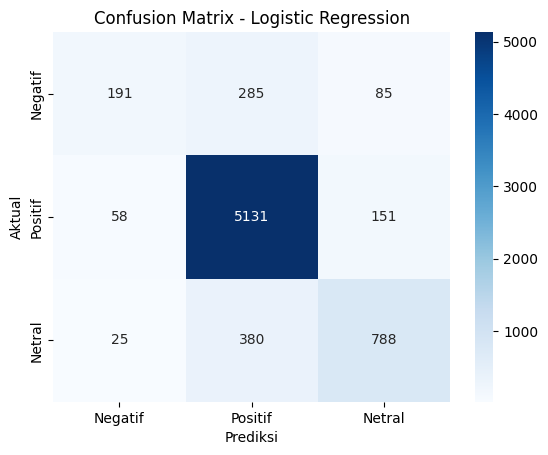

In [25]:
# Menghitung Confusion Matrix untuk model Logistic Regression
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print('Confusion Matrix - Logistic Regression:')
print(conf_matrix_logreg)

# Menampilkan Confusion Matrix dalam bentuk heatmap
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif', 'Netral'], yticklabels=['Negatif', 'Positif', 'Netral'])

# Menambahkan judul dan label pada sumbu heatmap
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

- Confussion Matrix - Random Forest

Confusion Matrix - Random Forest:
[[ 129  329  103]
 [  33 5137  170]
 [   8  509  676]]


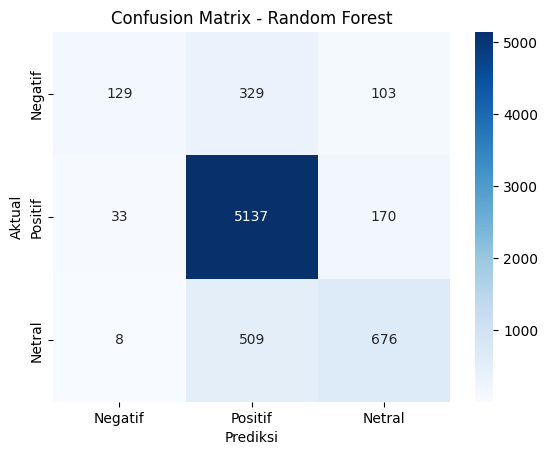

In [26]:
# Menghitung Confusion Matrix untuk model Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix - Random Forest:')
print(conf_matrix_rf)

# Menampilkan Confusion Matrix dalam bentuk heatmap
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif', 'Netral'], yticklabels=['Negatif', 'Positif', 'Netral'])

# Menambahkan judul dan label pada sumbu heatmap
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

- Confussion Matrix - SVM

Confusion Matrix - SVM:
[[ 230  247   84]
 [  74 5052  214]
 [  33  332  828]]


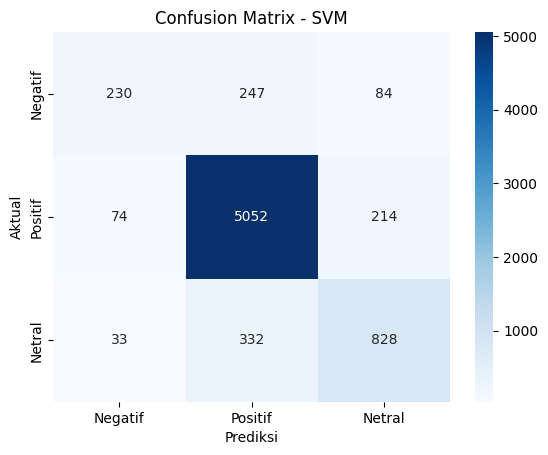

In [27]:
# Menghitung Confusion Matrix untuk model SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix - SVM:')
print(conf_matrix_svm)

# Menampilkan Confusion Matrix dalam bentuk heatmap
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif', 'Netral'], yticklabels=['Negatif', 'Positif', 'Netral'])

# Menambahkan judul dan label pada sumbu heatmap
plt.title('Confusion Matrix - SVM')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()


- Model Terbaik

In [28]:
# Menyimpulkan model terbaik berdasarkan akurasi dan macro F1-score
results = {
    "Logistic Regression": {"accuracy": acc_logreg, "macro_f1": macro_f1_logreg},
    "Random Forest": {"accuracy": acc_rf, "macro_f1": macro_f1_rf},
    "Support Vector Machine (SVM)": {"accuracy": acc_svm, "macro_f1": macro_f1_svm}
}

# Memilih model terbaik berdasarkan kombinasi akurasi dan macro F1-score
best_model = max(results, key=lambda x: (results[x]["accuracy"], results[x]["macro_f1"]))
print(f"Model terbaik berdasarkan akurasi dan macro F1-score: {best_model} dengan akurasi {results[best_model]['accuracy']:.2f} dan macro F1-score {results[best_model]['macro_f1']:.2f}")

Model terbaik berdasarkan akurasi dan macro F1-score: Support Vector Machine (SVM) dengan akurasi 0.86 dan macro F1-score 0.72


### Kesimpulan

Berdasarkan evaluasi dari ketiga model yang digunakan, yaitu **Logistic Regression**, **Random Forest**, dan **Support Vector Machine (SVM)**, dapat disimpulkan bahwa **SVM** memberikan performa terbaik untuk analisis sentimen ini. Meskipun **Logistic Regression** dan **SVM** memiliki tingkat **akurasi** yang sama, yaitu **86%**, **SVM** unggul dengan nilai **macro F1-score** yang lebih tinggi, yakni **0.72** dibandingkan **0.70** pada Logistic Regression.  

Selain itu, **SVM** menunjukkan performa yang lebih stabil dan konsisten dalam mengklasifikasikan kelas-kelas dengan distribusi yang lebih merata. Hal ini terlihat dari **confusion matrix** yang lebih seimbang di semua kelas sentimen, menjadikan **SVM** sebagai model yang lebih unggul untuk tugas klasifikasi ini.
